<a href="https://colab.research.google.com/github/caiobaptistaa/Econometria-4_PUC-Rio/blob/main/Trabalho_1_Quest_2_LASSO_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> D) AR + LASSO Regression <h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from math import log
from sklearn.preprocessing import StandardScaler

def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Trabalho-1/data.csv', sep= ",", low_memory= False)
CPI = pd.read_csv('/content/drive/MyDrive/Trabalho-1/CPI.csv', sep= ",", low_memory= False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
CPI.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff
0,1959-03-01,-0.001036,-0.000691
1,1959-04-01,0.000345,0.001381
2,1959-05-01,0.002066,0.001721
3,1959-06-01,0.002405,0.000339
4,1959-07-01,0.001372,-0.001032


In [4]:
CPI.shape

(758, 3)

In [5]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [6]:
data.shape

(759, 104)

CPI series has already been differentiated.

In [7]:
data = data.drop([758])

In [8]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [9]:
data = data.drop(columns = ["sasdate"]).reset_index(drop=True)

In [10]:
data.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.0223

In [11]:
CPI_data = CPI.merge(data, left_index = True, right_index = True, how = "left")

In [12]:
CPI_data.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-03-01,-0.001036,-0.000691,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-04-01,0.000345,0.001381,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-05-01,0.002066,0.001721,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-06-01,0.002405,0.000339,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,

In [13]:
date = CPI_data["sasdate"]
date = pd.DataFrame(date)
date

,sasdate
0,1959-03-01
1,1959-04-01
2,1959-05-01
3,1959-06-01
4,1959-07-01
...,...
753,2021-12-01
754,2022-01-01
755,2022-02-01
756,2022-03-01


In [14]:
CPI_data = CPI_data.drop(columns = ["sasdate", "CPIAUCSL"])

Let's check the variance distribution for each variable.

(array([1.21118846e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.17591112e-05]),
 array([3.55130748e-10, 8.17696545e+02, 1.63539309e+03, 2.45308963e+03,
        3.27078618e+03, 4.08848272e+03, 4.90617927e+03, 5.72387581e+03,
        6.54157236e+03, 7.35926890e+03, 8.17696545e+03, 8.99466199e+03,
        9.81235853e+03, 1.06300551e+04, 1.14477516e+04, 1.22654482e+04]),
 <a list of 15 Patch objects>)

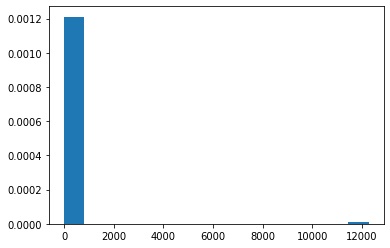

In [15]:
plt.hist(CPI_data.var(), density = True, bins = 15)

We can see that variables have much different variances, so we need to standardize all variables.
Below is the distribution of standardized variables.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([0.5       , 0.56666667, 0.63333333, 0.7       , 0.76666667,
        0.83333333, 0.9       , 0.96666667, 1.03333333, 1.1       ,
        1.16666667, 1.23333333, 1.3       , 1.36666667, 1.43333333,
        1.5       ]),
 <a list of 15 Patch objects>)

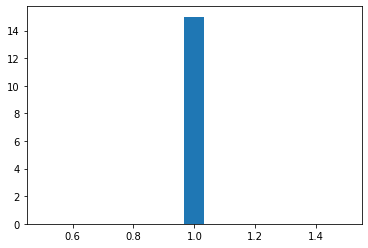

In [16]:
CPI_data_st = StandardScaler().fit_transform(CPI_data)
plt.hist(CPI_data_st.var(), density = True, bins = 15)

In [17]:
CPI_data_st = pd.DataFrame(CPI_data_st, columns = CPI_data.columns)
CPI_data_st.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.258455,0.108583,0.193494,0.906406,0.161428,1.708178,1.151487,0.607606,0.542204,0.090167,1.061919,0.575036,2.326189,2.269714,1.334968,1.395448,-0.139663,-0.712616,1.473948,-1.721245,-0.607043,-0.222529,-0.993786,-0.140494,-0.054644,-1.373790,-0.879914,-1.245373,-0.243808,0.435923,0.737411,-0.660331,-0.520031,1.305124,1.472550,0.718124,0.277493,0.505487,0.434448,0.650888,-0.400881,0.008493,-0.906949,0.684372,-0.648127,0.633820,1.880358,1.445484,-0.611358,0.149388,1.037944,1.901051,-0.037838,-0.218580,0.275844,-0.086402,-0.080429,-27.512535,-0.195628,0.480564,-0.592245,-0.630244,-0.093484,-0.281388,0.109777,0.447258,-0.150965,-0.211325,0.096329,0.098385,1.010108,1.326117,1.386022,0.606254,0.299797,-0.182066,-0.298562,0.093097,0.063242,0.093762,0.567089,-0.349974,-0.415682,-0.293982,-0.321401,-0.201599,-0.418018,-0.259179,-0.217700,-0.126516,-0.346324,-0.294710,-0.065931,-0.569256,-0.480858,-0.565951,-0.592904,-0.441750,-0.330511,-0.656172,0.026664,-0.265273,0.008753,-0.277803
1,0.511228,0.313990,0.805420,0.794293,0.225398,1.206603,0.409919,0.264115,-0.147245,0.526848,-0.780682,0.428611,1.881897,1.926443,1.128413,1.162602,0.127988,1.121675,1.224186,1.596671,1.176390,-0.682139,-0.258032,-0.672483,-0.726815,-0.833848,-0.284880,-1.006813,-0.728833,0.800472,1.413122,0.009849,0.910253,1.584521,1.845901,0.716290,0.428575,0.770772,0.685774,1.179223,1.078754,0.188542,-0.445148,1.384444,-0.512974,0.540381,1.766551,1.139111,-0.644327,0.374570,0.457942,1.946206,-0.037990,-0.146780,0.628604,-0.142053,-0.083000,0.036293,-0.186410,-0.180152,0.540046,0.518778,0.742048,0.248350,0.007615,0.177921,0.103327,0.119407,-0.041874,-0.185894,0.623251,0.834293,0.989328,0.348965,0.085877,-0.382288,-0.503770,0.172528,0.063242,0.103739,-0.411573,-0.443053,-0.357499,-0.345572,-0.331092,-0.198692,-0.344023,-0.328912,-0.151815,-0.133104,-0.252434,0.110352,-0.580824,-0.569256,-0.480858,-0.565951,-0.612247,-0.399996,-0.327353,-0.610832,0.020776,-0.265273,1.636826,1.843727
2,0.637727,0.319252,0.754672,-0.733718,-0.261991,1.873827,1.245503,1.153644,1.329201,0.125520,1.966389,1.293361,2.010668,1.443524,2.446943,1.645410,0.050800,-0.276023,1.792707,0.894963,0.976084,-0.911944,-0.503283,0.245529,-1.807208,-2.344100,-2.674855,-1.021678,-0.479376,0.734408,1.565568,0.102817,2.083310,1.379051,1.621342,0.573148,0.228769,0.320537,1.065941,-1.216544,0.887185,-0.028888,-0.137281,0.684372,-0.377821,0.479311,1.328302,1.007219,-0.432527,0.473540,0.179135,1.140810,-0.038076,-0.247723,0.002246,-0.124489,-0.080326,0.036595,0.013207,0.448268,0.303225,0.351538,0.324282,0.368745,0.365183,0.275862,0.421194,0.486887,0.464872,0.051005,0.608923,0.807707,0.923212,0.326263,0.067002,-0.413902,-0.578846,0.080792,0.063242,0.110344,-0.506733,-0.443053,-0.357499,-0.345572,-0.321483,-0.201599,-0.399632,-0.259179,-0.218148,-0.828122,-0.346324,-0.294710,-0.070389,-0.238317,-0.480858,-0.565951,-0.445394,-0.417803,-0.328616,-0.119930,0.014970,0.215006,-0.007133,-0.559505
3,0.124012,0.259160,0.684083,1.098180,0.192646,1.270393,0.634680,0.696171,0.302525,0.550100,-0.167456,1.644133,1.865382,1.679344,0.623430,1.015758

In [18]:
CPI_data_st.shape

(758, 104)

In [19]:
lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for col in CPI_data_st.columns:
  for i in lags:
    CPI_data_st[col + "_lag_" + str(i)] = CPI_data_st[col].shift(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [20]:
CPI_data_st.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2

In [21]:
CPI_data_st.shape

(758, 1248)

In [22]:
CPI_data_st = CPI_data_st.dropna()
CPI_data_st.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2

In [23]:
CPI_data_st.shape

(747, 1248)

In [24]:
CPI_data_st = CPI_data_st.reset_index(drop = True)

Function for calculate the Bayesian Information Criterion (BIC).

In [25]:
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic

Below we can see the Sliding Window Forecast algorithm. The windows are fixed at 492 observations for training and a one-step-ahead prediction 492 + 1. How can we select the best model? Here we select the model by alpha (regularization parameter), and choose the alpha that generates the smallest BIC. Then, we estimate 7 Lasso Models for each estimation window and select the best alpha, later we estimate the model with this alpha.
Remembering that the models are estimated with the original data and their time lags from 1 to 12 (including CPI time lags).
The forecast period is from March 2001 to November 2021.

*   Total Data   : x x x x x x x x x x x x
*   1 estimation : - x x x x x x o - - - - 
*   2 estimation : - - x x x x x x o - - -
*   3 estimation : - - - x x x x x x o - -
*   4 estimation : - - - - x x x x x x o -
*   5 estimation : - - - - - x x x x x x o


Where the x's are the sliding window and the "o" are the predicted observation.

In addition, the variables importances are calculated at each estimation and stored subsequently. The importances are calculated as the product between the coefficients and standard deviation of the variable. (representative number of estimation).

In [26]:
X = CPI_data_st.values
train, test = X[0:492], X[492:len(X)]
history = [x for x in train]
predictions = list()
importance_agg = list()
for t in range(len(test)):
  history = history[-492:]
  best_bic = 100000
  alpha = [1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.01]
  for i in alpha:
    model_val = Lasso(alpha = i)
    X_val = [item[1:] for item in history]
    y_val = [item[0] for item in history]
    model_val.fit(X_val, y_val)
    num_params = len(model_val.coef_) + 1
    yhat_bic = model_val.predict(X_val)
    mse_bic = mean_squared_error(y_val, yhat_bic)
    bic = calculate_bic(len(y_val), mse_bic, num_params)
    if bic < best_bic:
      best_bic = bic
      best_alpha = i
  model = Lasso(alpha = best_alpha)
  X_history = [item[1:] for item in history]
  y_history = [item[0] for item in history]
  model.fit(X_history, y_history)
  X_pred = test[t][1:]
  X_pred_features = X_pred.reshape(1, -1)
  yhat = model.predict(X_pred_features)
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #importance
  #Creating col names
  cols_names = CPI_data_st.columns[1:]
  #Transforming 1-D array to 2-D array
  coefs = model.coef_.reshape(1, -1)
  #Transforming into DataFrame
  coefs_df = pd.DataFrame(coefs, columns = cols_names)
  X_df = pd.DataFrame(X_history, columns = cols_names)
  #Calculating Variable Standard Deviation
  vars_std = X_df.std()
  vars_std_a = pd.DataFrame(vars_std.to_numpy().reshape(1, -1), columns = cols_names)
  #Concat std vars and coefs
  frames = [coefs_df, vars_std_a]
  importance = pd.concat(frames)
  #Importances
  importance_features = importance.prod()
  #Transforming into array
  importance_features_array = importance_features.to_numpy().reshape(1, -1)
  importance_features_array
  #Append to list
  importance_agg.append(importance_features_array[0])
  print('predicted=%f, observed=%f, window=%f, best_bic=%f, best_alpha=%f' % (yhat, obs[0], (len(history)-1), best_bic, best_alpha))
observed = [item[0] for item in test]
mse = mean_squared_error(observed, predictions)
rmse = sqrt(mean_squared_error(observed, predictions))
mae = mean_absolute_error(observed, predictions)
print('Test MSE: %.5f' % mse, 'Test RMSE: %.5f' % rmse, 'Test MAE: %.5f' % mae)

predicted=-1.594122, observed=-1.273370, window=492.000000, best_bic=6818.966560, best_alpha=0.010000
predicted=0.476242, observed=-0.635296, window=492.000000, best_bic=6819.774924, best_alpha=0.010000
predicted=0.429741, observed=0.419149, window=492.000000, best_bic=6823.243966, best_alpha=0.010000
predicted=1.067455, observed=1.252483, window=492.000000, best_bic=6823.016932, best_alpha=0.010000
predicted=0.205148, observed=-1.051579, window=492.000000, best_bic=6822.500296, best_alpha=0.010000
predicted=0.150482, observed=-1.466612, window=492.000000, best_bic=6821.851637, best_alpha=0.010000
predicted=0.859763, observed=0.626596, window=492.000000, best_bic=6823.469496, best_alpha=0.010000
predicted=-0.165199, observed=1.458682, window=492.000000, best_bic=6826.120963, best_alpha=0.010000
predicted=-1.347645, observed=-2.508395, window=492.000000, best_bic=6825.844928, best_alpha=0.010000
predicted=1.424313, observed=0.834996, window=492.000000, best_bic=6821.314386, best_alpha=0

In [27]:
len(predictions), len(observed), len(test), len(X)

(255, 255, 255, 747)

In [28]:
date = date[503: len(date)]
date = date.reset_index(drop= True)
date.head()

,sasdate
0,2001-02-01
1,2001-03-01
2,2001-04-01
3,2001-05-01
4,2001-06-01


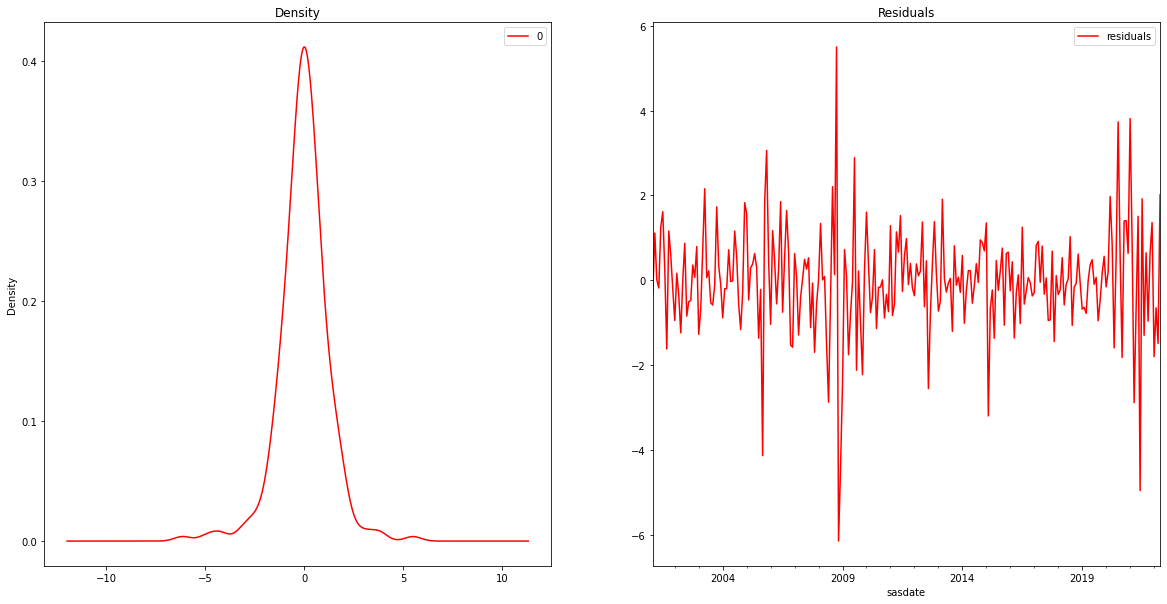

In [29]:
pred_df = pd.DataFrame(predictions)
observed_df = pd.DataFrame(observed)
residuals = pd.DataFrame(pred_df - observed_df)
residuals_date = date.merge(residuals, left_index = True, right_index = True, how = "left")
residuals_date.index = pd.DatetimeIndex(residuals_date["sasdate"])
residuals_date = residuals_date.drop(columns = ["sasdate"])
fig, ax = plt.subplots(1,2, figsize = (20, 10))
residuals.plot(kind='kde', title='Density', ax=ax[0], color = "red")
residuals_date.plot(title="Residuals", ax=ax[1], color = "red")
plt.legend(["residuals"])
plt.show()

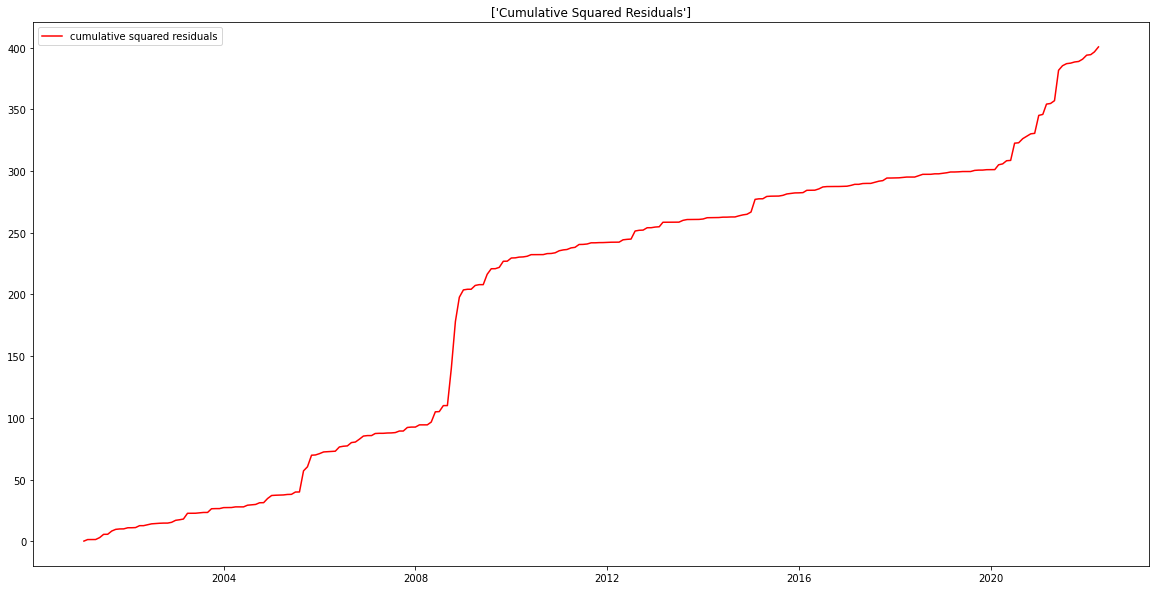

In [30]:
squared_residuals = residuals**2
cumsum_sqd_residuals = np.cumsum(squared_residuals)
cumsum_sqd_residuals_date = date.merge(cumsum_sqd_residuals, left_index = True, right_index = True, how = "left")
cumsum_sqd_residuals_date.index = pd.DatetimeIndex(cumsum_sqd_residuals_date["sasdate"])
cumsum_sqd_residuals_date = cumsum_sqd_residuals_date.drop(columns = ["sasdate"])

plt.figure(figsize= (20, 10))

plt.plot(cumsum_sqd_residuals_date, color = "red")
plt.title(["Cumulative Squared Residuals"])
plt.legend(["cumulative squared residuals"], loc = "upper left")

In [31]:
pred = pd.DataFrame(predictions)
observedd = pd.DataFrame(observed)

In [32]:
pred.shape, observedd.shape, date.shape 

((255, 1), (255, 1), (255, 1))

In [33]:
date.shape

(255, 1)

In [34]:
df_1 = date.merge(pred, left_index = True, right_index = True, how = "left")
df = df_1.merge(observedd, left_index = True, right_index = True, how = "left")

In [35]:
df.index = pd.DatetimeIndex(df["sasdate"])
df = df.drop(columns = ["sasdate"])

In [36]:
df.head()

,0_x,0_y
sasdate,,
2001-02-01,-1.594122,-1.273370
2001-03-01,0.476242,-0.635296
2001-04-01,0.429741,0.419149
2001-05-01,1.067455,1.252483
2001-06-01,0.205148,-1.051579


In [37]:
df = df.rename(columns = {"0_x" : "pred", "0_y" : "observed"})
df.head()

,pred,observed
sasdate,,
2001-02-01,-1.594122,-1.273370
2001-03-01,0.476242,-0.635296
2001-04-01,0.429741,0.419149
2001-05-01,1.067455,1.252483
2001-06-01,0.205148,-1.051579


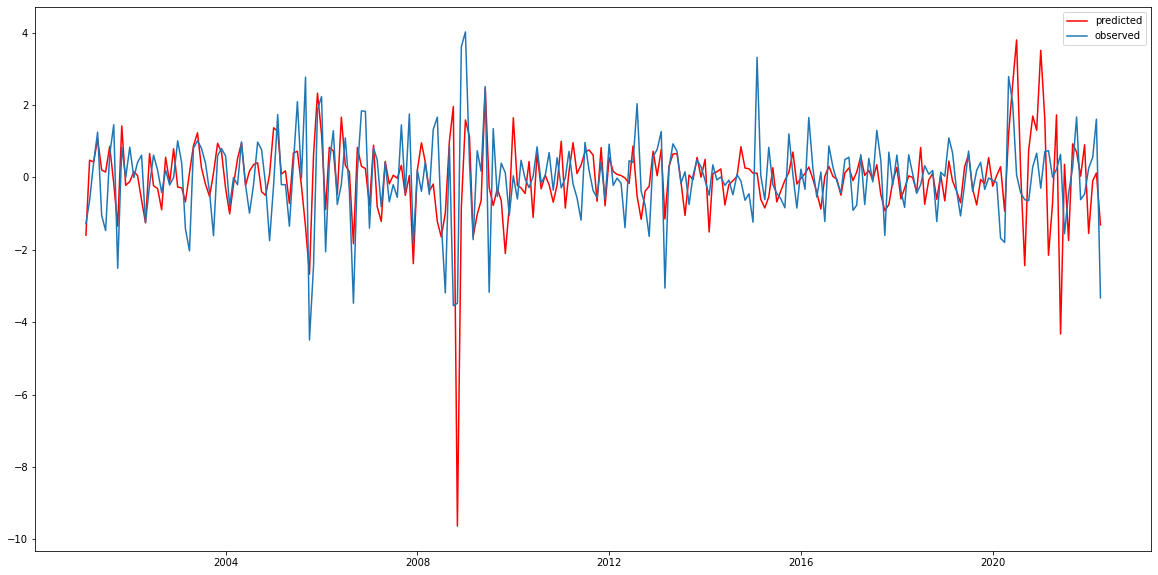

In [38]:
plt.figure(figsize= (20, 10))
plt.plot(df["pred"], color = "red")
plt.plot(df["observed"])
plt.legend(["predicted", "observed"])
plt.show()

The Lasso Autoregressive Model seems to have been more accurate than the AR, PCR and Ridge, this can be seen graphically and confirmed by the smaller MSE. Lasso had an MSE of 0.81, RMSE of 0.90 and a MAE of 0.56, much lower than the errors presented by the other three models. However, it is still possible to observe jumps in the periods of 2008 and 2020, that is, the period of the international financial crisis and pandemic, respectively.

<h3> b) <h3>

In [39]:
df_importances = pd.DataFrame(importance_agg, columns = cols_names)
df_importances.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2,CLF16OV_lag_3

In [40]:
df_rel_importances = df_importances.copy()
df_rel_importances["sum"] = df_rel_importances.abs().sum(axis = 1)
df_rel_importances["sum"].head()

0    8.350373
1    8.335497
2    8.330438
3    8.305308
4    8.305346
Name: sum, dtype: float64

In [41]:
df_rel_importances.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2,CLF16OV_lag_3

The importances are transformed to percentages.

In [42]:
for col in df_rel_importances.columns[:-1]:
  df_rel_importances[col] = (df_rel_importances[col].abs()*100)/df_rel_importances["sum"]
df_rel_importances.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2,CLF16OV_lag_3

In [43]:
df_rel_importances["test"] = df_rel_importances.sum(axis = 1) - df_rel_importances["sum"]
df_rel_importances["test"].head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: test, dtype: float64

In [44]:
df_rel_importances.shape

(255, 1249)

In [45]:
df_rel_importances = df_rel_importances.drop(columns = ["sum", "test"])
df_rel_importances.shape

(255, 1247)

Now, we aggregate the lags into the original variables. Remembering that as the variables are standardized in percentage of importance, their sum indicates the percentage of importance of the original variable and its lags.

In [46]:
lags_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
df_agg_lags = df_rel_importances.copy()
for col in df_agg_lags.columns[0: 103]:
  for i in lags_range:
    df_agg_lags[col] = df_agg_lags[col] + df_agg_lags[col + "_lag_" + str(i)]
    df_agg_lags = df_agg_lags.drop(columns = [col + "_lag_" + str(i)])

In [47]:
df_agg_lags.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11
0,0.251265,1.766371,1.113401,1.394937,0.0,0.0,0.038875,0.019475,0.055264,1.582539,0.141655,0.0,0.000000,0.534011,0.000000,0.909061,1.961694,0.040410,2.686554,0.0,0.0,0.262950,0.283093,1.222114,0.399118,0.709813,2.158103,0.838965,0.0,0.0,1.592205,0.756558,0.0,1.810097,1.240755,0.0,0.0,0.948550,0.138881,0.000000,1.401252,0.699142,0.273873,0.0,0.0,0.0,0.627102,0.288401,0.134552,0.223897,2.407583,0.0,0.0,3.389549,0.0,0.0,0.0,0.0,0.323543,0.184481,2.139286,3.705666,0.770711,2.368646,0.091768,2.371537,1.389488,2.293724,0.000000,0.0,0.0,0.499590,0.0,0.0,0.0,0.0,1.371248,3.131709,1.669735,1.243372,1.421667,1.410133,1.154011,0.205956,1.530710,0.177560,0.966661,0.0,3.151183,0.0,1.382136,1.783632,1.994867,0.286119,0.296240,0.129171,0.870305,0.620400,1.909701,1.304725,2.530265,1.969363,1.088024,6.339449,3.551723,2.330081,1.053520,0.781743,0.001113,0.0,0.550767,0.371914,0.0,0.980290
1,0.255713,1.762498,1.110419,1.399295,0.0,0.0,0.040961,0.000000,0.084098,1.540451,0.140827,0.0,0.000000,0.543831,0.000000,0.885403,1.959655,0.038371,2.703184,0.0,0.0,0.280419,0.275903,1.219220,0.398612,0.711950,2.129894,0.885303,0.0,0.0,1.599155,0.724776,0.0,1.790994,1.218290,0.0,0.0,1.008100,0.129603,0.009288,1.321039,0.689417,0.289578,0.0,0.0,0.0,0.636860,0.279030,0.127051,0.171868,2.449334,0.0,0.0,3.453973,0.0,0.0,0.0,0.0,0.328978,0.191621,2.128264,3.764421,0.781272,2.366395,0.135724,2.365792,1.446991,2.248225,0.000000,0.0,0.0,0.524397,0.0,0.0,0.0,0.0,1.324414,3.184864,1.739367,1.217059,1.436258,1.442357,1.159296,0.223100,1.544012,0.159837,0.963115,0.0,3.115429,0.0,1.390402,1.764583,2.042970,0.220717,0.312417,0.093990,0.870547,0.670568,1.899018,1.288933,2.514754,1.978059,1.066784,6.323810,3.535046,2.299539,1.036796,0.768828,0.015345,0.0,0.534970,0.331882,0.0,0.984491
2,0.285863,1.846332,1.138303,1.382565,0.0,0.0,0.013117,0.000000,0.111421,1.345643,0.160980,0.0,0.000000,0.492608,0.004917,0.889771,1.814781,0.137368,2.710665,0.0,0.0,0.425996,0.250519,1.220029,0.371673,0.741444,1.977312,0.836005,0.0,0.0,1.661913,0.728984,0.0,1.756621,1.183627,0.0,0.0,1.072191,0.120398,0.043298,1.384789,0.767072,0.341759,0.0,0.0,0.0,0.635722,0.234652,0.075815,0.034507,2.442287,0.0,0.0,3.430490,0.0,0.0,0.0,0.0,0.260349,0.238417,2.167186,3.859207,0.844289,2.296731,0.252733,2.262293,1.503987,2.288995,0.087188,0.0,0.0,0.472528,0.0,0.0,0.0,0.0,1.379262,2.972022,1.697362,0.984243,1.401832,1.300328,1.197387,0.466444,1.572201,0.212562,0.946612,0.0,3.151232,0.0,1.308428,1.620941,2.164675,0.133572,0.156740,0.159638,0.920932,0.698689,1.996093,1.273728,2.435018,1.950877,1.155463,6.414819,3.756817,2.365908,1.114251,0.800305,0.000000,0.0,0.543274,0.189911,0.0,0.953095
3,0.264042,1.893921,1.092539,1.392630,0.0,0.0,0.016329,0.038694,0.159344,1.308385,0.174965,0.0,0.092286,0.480289,0.000000,0.883573,1.847274,0.026048,2.657883,0.0,0.0,0.438348,0.196929,1.169531,0.298303,0.771856,1.974955,0.827152,0.0,0.0,1.63398

In [48]:
df_agg_lags.shape

(255, 114)

Adding the columns per row to confirm the total is 100.

In [49]:
df_agg_lags["test"] = df_agg_lags.sum(axis = 1)
df_agg_lags["test"].head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: test, dtype: float64

We already know what variables we need to change name

In [50]:
df_agg_lags = df_agg_lags.rename(columns = {"IPB51222S" : "IPB51222s", "CUSR0000SAD" : "CUUR0000SAD", "CUSR0000SA0L2" : "CUUR0000SA0L2"})

In [51]:
Output_and_Income = ["RPI", "W875RX1", "INDPRO", "IPFPNSS", "IPFINAL", "IPCONGD", "IPDCONGD", "IPNCONGD",
           "IPBUSEQ", "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222s", "IPFUELS", "CUMFNS"]

Labor_Market = ["CLF16OV", "CE16OV", "UNRATE", "UEMPMEAN", "UEMPLT5", "UEMP5TO14", "UEMP15OV", "UEMP15T26",
           "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001", "USCONS", "MANEMP", "DMANEMP", "NDMANEMP",
           "SRVPRD", "USTPU", "USWTRADE", "USTRADE", "USFIRE", "USGOVT", "CES0600000007", "AWOTMAN", "AWHMAN",
           "CES0600000008", "CES2000000008", "CES3000000008"]

Consumption_and_Orders = ["HOUST", "HOUSTNE", "HOUSTMW", "HOUSTS", "HOUSTW"]

Orders_and_Inventories =  ["DPCERA3M086SBEA", "RETAILx", "AMDMNOx",
            "AMDMUOx"]

Money_and_Credit = ["M1SL", "M2SL", "M2REAL", "TOTRESNS", "NONBORRES", "BUSLOANS", "REALLN",
           "INVEST"] 

Interest_and_Exhange = ["FEDFUNDS", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA",
           "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM", "AAAFFM", "BAAFFM",
           "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"]

Prices = ["OILPRICEx", "PPICMM", "CPIAPPSL", "CPITRNSL",
           "CPIMEDSL", "CUSR0000SAC", "CUUR0000SAD", "CUSR0000SAS", "CPIULFSL", "CUUR0000SA0L2", "CUSR0000SA0L5", "PCEPI", "DDURRG3M086SBEA",
           "DNDGRG3M086SBEA", "DSERRG3M086SBEA"]

Stock_Market = ["S&P 500", "S&P: indust"] 

Lags_CPI = ["CPIAUCSL_diff_lag_1", "CPIAUCSL_diff_lag_2", "CPIAUCSL_diff_lag_3", "CPIAUCSL_diff_lag_4", "CPIAUCSL_diff_lag_5",
           "CPIAUCSL_diff_lag_6", "CPIAUCSL_diff_lag_7", "CPIAUCSL_diff_lag_8", "CPIAUCSL_diff_lag_9", "CPIAUCSL_diff_lag_10",
           "CPIAUCSL_diff_lag_11"]

Others = ["BOGMBASE", "WPSFD49207", "WPSFD49502", "WPSID61", "WPSID62"]

In [52]:
groups = [Output_and_Income, Labor_Market, Consumption_and_Orders, Orders_and_Inventories, Money_and_Credit,
          Interest_and_Exhange, Prices, Stock_Market, Lags_CPI, Others]

list_groups = []

for group in groups:
  g = df_agg_lags[group].sum(axis = 1)
  list_groups.append(g)

list_groups_transpose = np.transpose(list_groups)
list_groups_df = pd.DataFrame(list_groups_transpose)
list_groups_df

list_groups_df["test"] = list_groups_df.sum(axis = 1)
list_groups_df

,0,1,2,3,4,5,6,7,8,9,test
0,7.300621,23.226376,1.050056,5.139818,4.801117,20.907193,15.098685,2.323767,15.960600,4.191767,100.0
1,7.251808,23.166471,1.042941,5.130916,4.849735,21.098921,15.047606,2.319885,15.830706,4.261011,100.0
2,7.102802,23.253919,0.946189,4.997662,4.846302,20.900840,15.042314,2.405603,16.138379,4.365990,100.0
3,7.185150,23.197510,0.913565,4.977491,4.874504,20.866339,15.157287,2.386082,15.922758,4.519313,100.0
4,7.176914,22.969980,0.905766,5.006497,4.889010,20.947751,15.166814,2.402020,15.861619,4.673630,100.0
...,...,...,...,...,...,...,...,...,...,...,...
250,14.336451,18.065978,0.907278,6.591594,15.257957,13.063655,15.210713,2.001127,10.184586,4.380662,100.0
251,14.246900,18.303250,0.909436,6.493917,15.364911,13.004385,15.387809,2.046340,10.019967,4.223084,100.0
252,14.346214,17.969736,1.334839,6.449188,15.314976,13.158325,15.208404,1.972178,10.372924,3.873215,100.0
253,14.355466,17.969118,1.594425,6.446841,15.184145,12.141550,15.572273,1.982739,10.569911,4.183532,100.0


In [53]:
groups_importances = list_groups_df.drop(columns = ["test"])
groups_importances = groups_importances.rename(columns = {0 : "Output_and_Income", 1 : "Labor_Market", 2 : "Consumption_and_Orders",
                                                          3 : "Orders_and_Inventories", 4 : "Money_and_Credit", 5 : "Interest_and_Exhange",
                                                          6 : "Prices", 7 : "Stock_Market", 8 : "Lags_CPI", 9 : "Others"})
groups_importances.head()

,Output_and_Income,Labor_Market,Consumption_and_Orders,Orders_and_Inventories,Money_and_Credit,Interest_and_Exhange,Prices,Stock_Market,Lags_CPI,Others
0,7.300621,23.226376,1.050056,5.139818,4.801117,20.907193,15.098685,2.323767,15.960600,4.191767
1,7.251808,23.166471,1.042941,5.130916,4.849735,21.098921,15.047606,2.319885,15.830706,4.261011
2,7.102802,23.253919,0.946189,4.997662,4.846302,20.900840,15.042314,2.405603,16.138379,4.365990
3,7.185150,23.197510,0.913565,4.977491,4.874504,20.866339,15.157287,2.386082,15.922758,4.519313
4,7.176914,22.969980,0.905766,5.006497,4.889010,20.947751,15.166814,2.402020,15.861619,4.673630


In [54]:
groups_importances_date = date.merge(groups_importances, left_index = True, right_index = True, how = "left")
groups_importances_date.index = pd.DatetimeIndex(groups_importances_date["sasdate"])
groups_importances_date = groups_importances_date.drop(columns = ["sasdate"])
groups_importances_date.head()

,Output_and_Income,Labor_Market,Consumption_and_Orders,Orders_and_Inventories,Money_and_Credit,Interest_and_Exhange,Prices,Stock_Market,Lags_CPI,Others
sasdate,,,,,,,,,,
2001-02-01,7.300621,23.226376,1.050056,5.139818,4.801117,20.907193,15.098685,2.323767,15.960600,4.191767
2001-03-01,7.251808,23.166471,1.042941,5.130916,4.849735,21.098921,15.047606,2.319885,15.830706,4.261011
2001-04-01,7.102802,23.253919,0.946189,4.997662,4.846302,20.900840,15.042314,2.405603,16.138379,4.365990
2001-05-01,7.185150,23.197510,0.913565,4.977491,4.874504,20.866339,15.157287,2.386082,15.922758,4.519313
2001-06-01,7.176914,22.969980,0.905766,5.006497,4.889010,20.947751,15.166814,2.402020,15.861619,4.673630


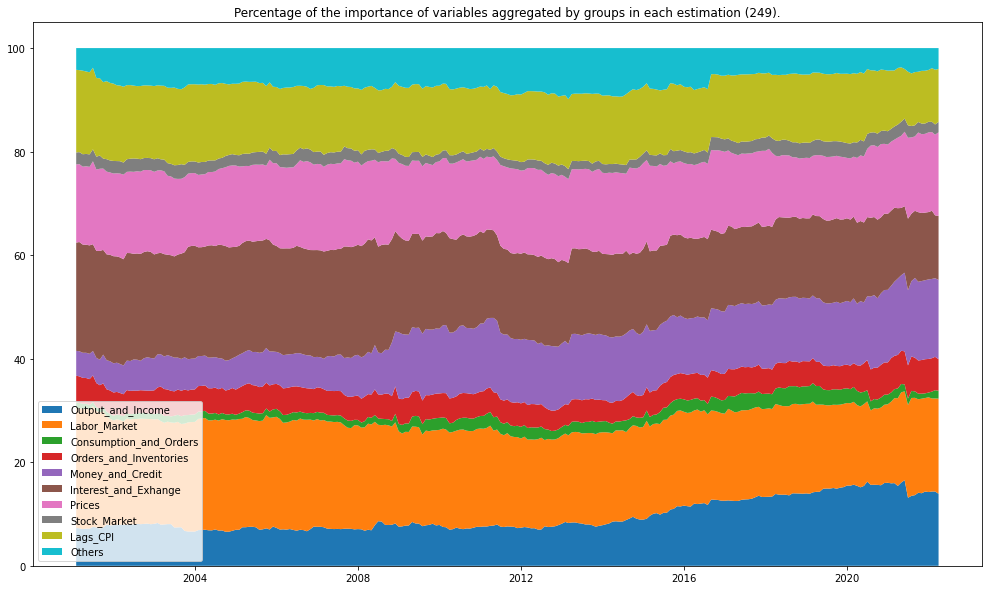

In [55]:
# Create figure
        
fig = plt.figure() 

# Figure size

fig.set_size_inches(17, 10)

plt.stackplot(groups_importances_date.index,groups_importances_date["Output_and_Income"], groups_importances_date["Labor_Market"], groups_importances_date["Consumption_and_Orders"],
              groups_importances_date["Orders_and_Inventories"], groups_importances_date["Money_and_Credit"], groups_importances_date["Interest_and_Exhange"], groups_importances["Prices"],
              groups_importances_date["Stock_Market"], groups_importances_date["Lags_CPI"], groups_importances_date["Others"], labels = groups_importances.columns)

plt.title('Percentage of the importance of variables aggregated by groups in each estimation (249).')
plt.legend(loc= "lower left")

Again, we can see a small increase in the importance of the labor market group in inflation. 